<a href="https://colab.research.google.com/github/Anthony-Rispoli/DataMining/blob/main/Homework3%264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps
#https://anderfernandez.com/en/blog/dbscan-python-tutorial/
#https://www.reneshbedre.com/blog/dbscan-python.html

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import seaborn as sns
import geopandas as gpd
from collections import Counter
data = pd.read_csv('/content/drive/MyDrive/uszips.csv')      ##read csv file

In [41]:
data.drop(data.iloc[:, 5:18], inplace=True, axis=1)  ## remove unwanted columns

In [43]:
data = data[data.state_id != 'PR']              ##drop territories and alaska/hawaii
data = data[data.state_id != 'VI']
data = data[data.state_id != 'AK']
data = data[data.state_id != 'HI']
data = data[data.state_id != 'GU']
data = data[data.state_id != 'MP']
data = data[data.state_id != 'AS']
print(data) 

         zip       lat        lng         city state_id     state_name  zcta  \
138     1001  42.06262  -72.62521       Agawam       MA  Massachusetts  True   
139     1002  42.37633  -72.46462      Amherst       MA  Massachusetts  True   
140     1003  42.39135  -72.52327      Amherst       MA  Massachusetts  True   
141     1005  42.42117  -72.10655        Barre       MA  Massachusetts  True   
142     1007  42.28163  -72.40009  Belchertown       MA  Massachusetts  True   
...      ...       ...        ...          ...      ...            ...   ...   
33538  99401  46.09041 -117.27336      Anatone       WA     Washington  True   
33539  99402  46.18680 -117.14922       Asotin       WA     Washington  True   
33540  99403  46.38114 -117.25974    Clarkston       WA     Washington  True   
33786  13021  42.91713  -76.55420       Auburn       NY       New York  True   
33787  13024  42.93453  -76.57424       Auburn       NY       New York  True   

       parent_zcta  population  density

In [30]:
data.dropna() ##drop any 

,zip,lat,lng,city,state_id
138,1001,42.06262,-72.62521,Agawam,MA
139,1002,42.37633,-72.46462,Amherst,MA
140,1003,42.39135,-72.52327,Amherst,MA
141,1005,42.42117,-72.10655,Barre,MA
142,1007,42.28163,-72.40009,Belchertown,MA
...,...,...,...,...,...
33538,99401,46.09041,-117.27336,Anatone,WA
33539,99402,46.18680,-117.14922,Asotin,WA
33540,99403,46.38114,-117.25974,Clarkston,WA
33786,13021,42.91713,-76.55420,Auburn,NY


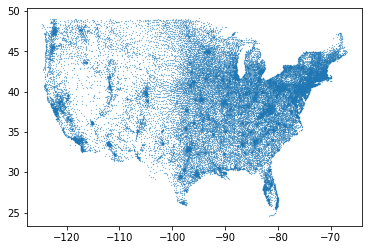

In [31]:
plt.scatter(x=data['lng'], y=data['lat'], s=.05)
plt.show()

In [32]:
nn_data = data.copy()[['lng', 'lat']]

In [33]:
#calc nearest neighbor
nn = NearestNeighbors(n_neighbors = 1500)
nn_fit = nn.fit(nn_data)
distances, ind = nn.kneighbors(nn_data)
distances = np.sort(distances, axis = 0)

distances = distances[:,1]

i = np.arange(len(distances))



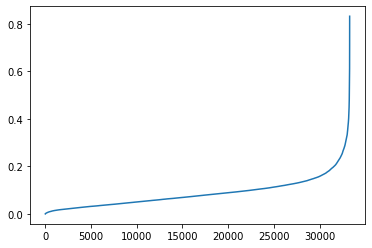

In [34]:
sns.lineplot(x=i,y=distances)

In [35]:
##based on the graph above, the best epsilon value would be about .2

##perform db scan
db_clusters = DBSCAN(eps = .2, min_samples = 50).fit(nn_data)
##obtain the labels of the clusters
db_clusters.labels_
Counter(db_clusters.labels_)


Counter({-1: 29110,
         0: 183,
         1: 726,
         2: 295,
         3: 279,
         4: 322,
         5: 94,
         6: 135,
         7: 57,
         8: 86,
         11: 241,
         9: 144,
         10: 116,
         12: 94,
         13: 116,
         14: 168,
         15: 134,
         16: 56,
         17: 98,
         18: 83,
         19: 367,
         20: 67,
         21: 132,
         22: 54,
         23: 57,
         24: 83})

In [36]:
set(db_clusters.labels_)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24}

In [37]:
labels = db_clusters.labels_

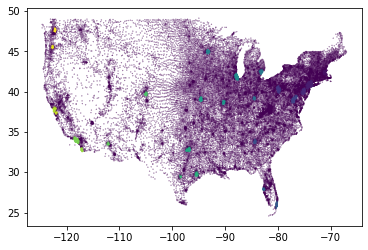

In [38]:
plt.scatter(x=nn_data['lng'], y=nn_data['lat'], s=.05, c = labels)
plt.show()

The clusters above generally identified the location of a few different major cities. It looked to combine washington DC and Baltimore. 
Additionally, it seemed to successfully identify Denver, LA, San Diego, Portland, and Seattle.
San Francisco and San Jose seem to have been combined into one cluster. 
Also identified as a cluster is Chicago and Minneapolis. There are a few other clusters identified but these are the major ones identified.

In [39]:
##Changing parameters of DBscan to test effect on clusters
##Specifically, and eps value was increased from .2 to .25 and the min_sample size was kept at 50.

##perform db scan
db_clusters2 = DBSCAN(eps = .25, min_samples = 50).fit(nn_data)
##obtain the labels of the clusters
db_clusters2.labels_
Counter(db_clusters.labels_)
labels = db_clusters2.labels_


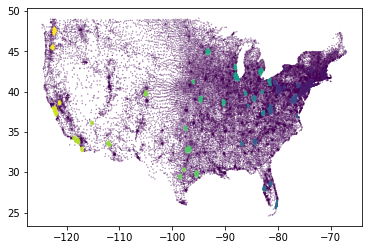

In [44]:
plt.scatter(x=nn_data['lng'], y=nn_data['lat'], s=.05, c = labels)
plt.show()

Increasing the epsilon value seemed to have a positive effect on the DBscan clusters. There has been some accurate points that were lost, but there are also more clusters present that accurately represent major cities. Examples of new clusters that represent major cities are the 3 clusters in Texas, representing Austin, Dallas, and Houston. Jacksonville, Tampa, and Miami are also clusters that are relatively accurate. 

In [46]:
##Changing parameters of DBscan to test effect on clusters
##Specifically, and min samples value was increased from 50 to 75 and the eps value was kept at .25.

##perform db scan
db_clusters3 = DBSCAN(eps = .25, min_samples = 75).fit(nn_data)
##obtain the labels of the clusters
db_clusters3.labels_
Counter(db_clusters.labels_)
labels = db_clusters3.labels_

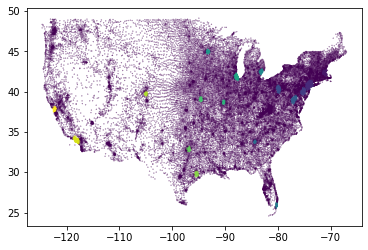

In [47]:
plt.scatter(x=nn_data['lng'], y=nn_data['lat'], s=.05, c = labels)
plt.show()

This had an adverse effect on the model. The number of clusters has decreased and the overall accurcacy has slightly decreased. 

In [49]:
##Changing parameters of DBscan to test effect on clusters
##Specifically, and min samples value was decreased from 75 to 25 and the eps value was kept at .25.

##perform db scan
db_clusters4 = DBSCAN(eps = .25, min_samples = 75).fit(nn_data)
##obtain the labels of the clusters
db_clusters4.labels_
Counter(db_clusters.labels_)
labels = db_clusters4.labels_

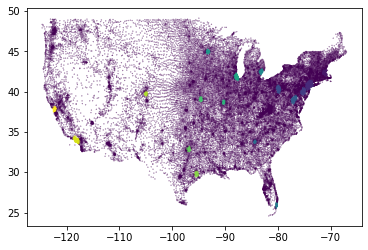

In [50]:
plt.scatter(x=nn_data['lng'], y=nn_data['lat'], s=.05, c = labels)
plt.show()

This again did not seem to improve the model and had an adverse effect on the overall accurcary in determining major cities. The most successfully clustering was found when the Epsilon value was .25 and the minimum sample size was set to 50. 